<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Linear_Regression(Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from sklearn.linear_model import LinearRegression
import numpy as np


# data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

# model
lr = LinearRegression()
lr.fit(X, y)

# model parameters
print("Slope:", lr.coef_)
print("Intercept:", lr.intercept_)

# prediction for existing points
y_pred = lr.predict(X)

# prediction for new value
x_new = np.array([[6]])
y_new = lr.predict(x_new)
print("Prediction for 6:", y_new)


Slope: [2.]
Intercept: 0.0
Prediction for 6: [12.]


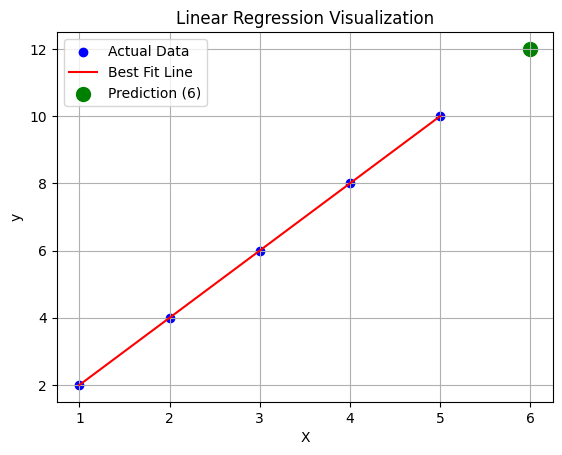

In [82]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
# ----- Visualization -----

plt.scatter(X, y, color='blue', label='Actual Data')     # data points
plt.plot(X, y_pred, color='red', label='Best Fit Line')  # regression line
plt.scatter(x_new, y_new, color='green', s=100, label='Prediction (6)')

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Visualization")
plt.legend()
plt.grid(True)
plt.show()

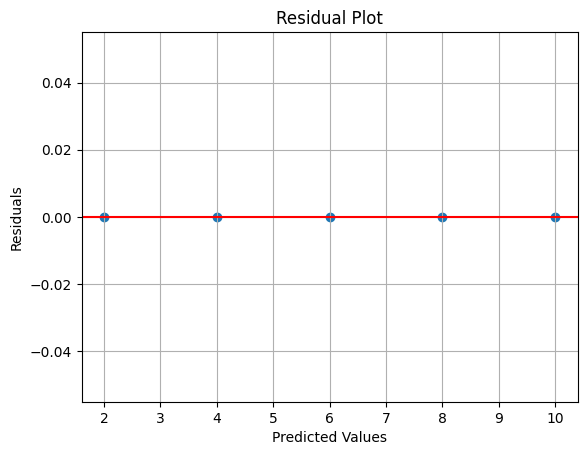

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([[1],[2],[3],[4],[5]])
y = np.array([2,4,6,8,10])

# Model
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

# Residuals
residuals = y - y_pred

# Plot
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid()
plt.show()


#Linear Regression using Gradient Descent

Final slope: 1.9282130948047977
Final intercept: 0.30733399082283186


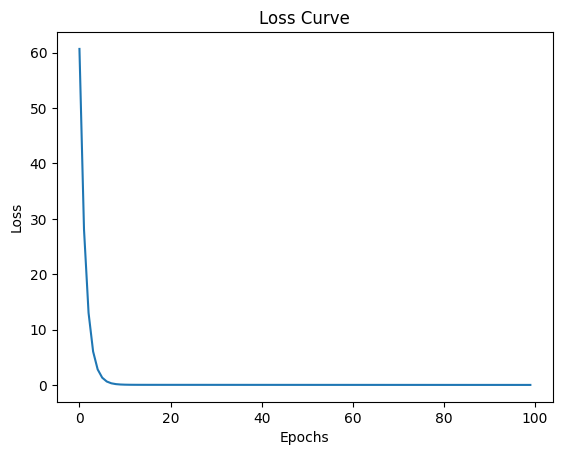

In [84]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array([1,2,3,4,5,6])
y=np.array([2,4,6,8,10,12])

#Initialize
m=0
b=0
lr=0.01
epochs=100

n=len(X)
losses=[]

for i in range(epochs):
  y_pred=m*X +b
  error=y-y_pred

  #gradient
  dm=(-2/n) * np.sum(X *error)
  db=(-2/n) *np.sum(error)

  #update
  m=m -lr*dm
  b=b-lr*db

  loss=np.mean(error**2)
  losses.append(loss)

print("Final slope:",m)
print("Final intercept:",b)

#loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

#Polynomial Regression

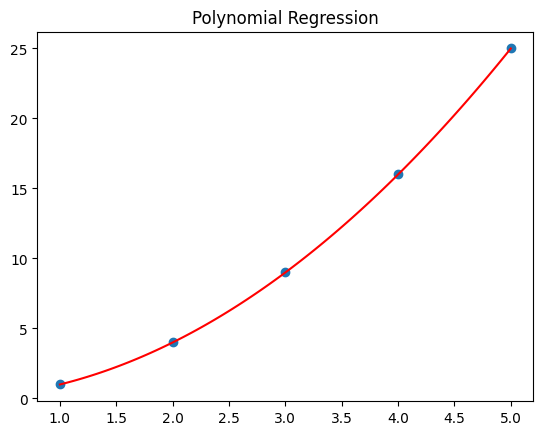

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Non-linear data
X = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([1,4,9,16,25])

# Transform
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Model
lr = LinearRegression()
lr.fit(X_poly, y)

# Prediction curve
X_new = np.linspace(1,5,100).reshape(-1,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

plt.scatter(X, y)
plt.plot(X_new, y_new, color='red')
plt.title("Polynomial Regression")
plt.show()


#Ridge vs Lasso Comparison

In [86]:
from sklearn.linear_model import Ridge, Lasso
import numpy as np

X = np.random.rand(100,5)
y = 3*X[:,0] + 2*X[:,1] + np.random.randn(100)

ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.1)

ridge.fit(X,y)
lasso.fit(X,y)

print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)


Ridge Coefficients: [ 2.09924353  1.95086441 -0.10389998  0.50824603 -0.51084539]
Lasso Coefficients: [ 1.33849327  0.89296383 -0.          0.         -0.        ]


In [87]:
class MeraLR:
  def __init__(self):
    self.m=None
    self.b=None

  def fit(self,X_train,y_train):
    num=0
    den=0
    for i in range(X_train.shape[0]):

        num=num+((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
        den=den+((X_train[i]-X_train.mean())*(X_train[i]-X_train.mean()))

    self.m=num/den
    self.b=y_train.mean()-(self.m*X_train.mean())
    print(self.m)
    print(self.b)
  def predict(self,X_test):
    return self.m*X_test+self.b

In [88]:
import pandas as pd
df=pd.read_csv('placement.csv')

In [89]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [90]:
X=df.iloc[:,0].values
y=df.iloc[:,1].values

In [91]:
X

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [92]:
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [94]:
X_train.shape

(160,)

In [95]:
lr=MeraLR()

In [96]:
lr.fit(X_train,y_train)

0.5579519734250721
-0.8961119222429152


In [97]:
X_train

array([7.14, 8.93, 5.42, 5.1 , 7.77, 6.76, 6.89, 6.68, 7.91, 7.89, 8.71,
       7.95, 6.61, 6.26, 6.53, 6.42, 5.11, 6.09, 6.93, 7.04, 5.94, 6.05,
       5.83, 5.95, 9.31, 5.58, 7.88, 6.13, 7.76, 4.85, 6.19, 8.6 , 6.07,
       7.18, 5.12, 7.39, 8.25, 8.28, 7.13, 7.35, 5.66, 5.99, 8.01, 7.14,
       6.34, 6.89, 5.42, 6.47, 7.69, 7.4 , 7.28, 5.95, 7.38, 6.93, 8.99,
       7.36, 7.08, 5.38, 7.56, 8.22, 5.84, 6.78, 7.19, 7.28, 6.79, 6.12,
       6.85, 8.2 , 6.84, 7.37, 6.22, 6.61, 5.23, 7.21, 6.85, 6.19, 7.3 ,
       6.17, 5.89, 8.09, 7.11, 4.26, 6.94, 5.98, 6.71, 7.33, 9.06, 6.1 ,
       5.48, 6.1 , 7.56, 7.29, 5.84, 7.48, 7.61, 5.79, 5.61, 7.34, 9.38,
       7.91, 6.94, 7.94, 8.31, 6.96, 6.93, 7.11, 8.44, 8.18, 6.66, 8.44,
       7.12, 6.3 , 5.84, 6.98, 7.63, 5.64, 7.43, 8.87, 7.84, 5.84, 9.58,
       8.37, 7.63, 6.31, 6.5 , 8.11, 6.07, 4.73, 7.3 , 6.51, 7.28, 6.92,
       6.35, 8.62, 7.05, 9.26, 6.33, 6.22, 6.94, 5.13, 8.13, 5.9 , 9.04,
       6.06, 7.57, 8.1 , 9.16, 5.84, 7.89, 6.63, 7.

In [98]:
X_train[0]

np.float64(7.14)

In [99]:
X_train.mean()

np.float64(6.989937500000001)

Text(0, 0.5, 'PACKAGE')

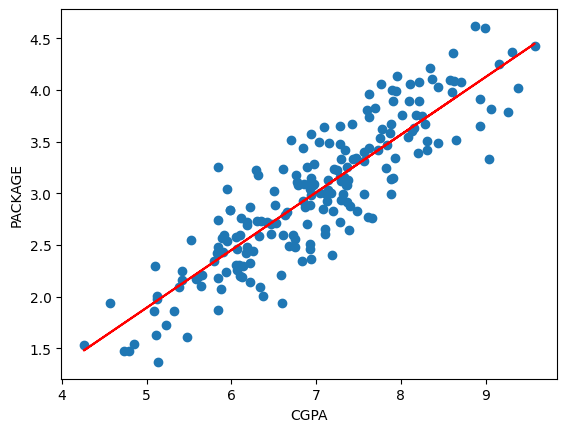

In [101]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('PACKAGE')

In [103]:
X_test

array([8.58, 7.15, 5.88, 6.22, 4.57, 4.79, 5.32, 6.86, 8.35, 6.87, 8.94,
       7.9 , 6.93, 5.91, 7.32, 7.82, 5.09, 7.42, 6.94, 7.73, 6.19, 7.28,
       6.73, 7.2 , 8.21, 6.75, 7.87, 7.6 , 8.63, 5.12, 8.15, 7.36, 8.31,
       6.6 , 6.59, 7.47, 7.93, 6.29, 6.37, 6.47])

In [104]:
X_test[0]

np.float64(8.58)

In [105]:
lr.predict(X_test[0])

np.float64(3.891116009744203)